<a href="https://colab.research.google.com/github/Praneeth3011/HandwrittenDigitRecognition/blob/main/digitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step1: Importing necessary libraries**

In [1]:
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt

**Step2: Importing dataset**

In [2]:
mnist = tf.keras.datasets.mnist

**Step3: Splitting data into training and testing phases**

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

**Step4: Normalizing the data**

In [4]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

**Step5: Defining model**

In [5]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**Step6: Training the model**

In [7]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 13s 5ms/step - loss: 0.3184 - accuracy: 0.9125
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1466 - accuracy: 0.9563
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0994 - accuracy: 0.9700
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0743 - accuracy: 0.9779
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0579 - accuracy: 0.9824


**Step7: Testing the model**

In [8]:
accuracy, loss = model.evaluate(x_test, y_test)
accuracy, loss
model.save('digits.model')

313/313 [==============================] - 1s 2ms/step - loss: 0.0897 - accuracy: 0.9723


**Step8: Displaying the predicted output using OpenCV**

1/1 [==============================] - 0s 73ms/step
The number displayed probably is :0


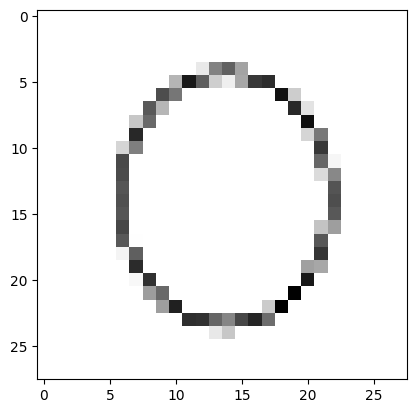

1/1 [==============================] - 0s 19ms/step
The number displayed probably is :1


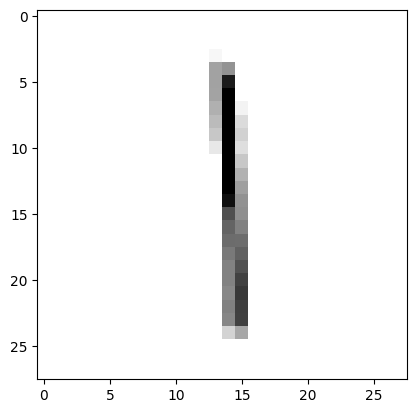

1/1 [==============================] - 0s 21ms/step
The number displayed probably is :2


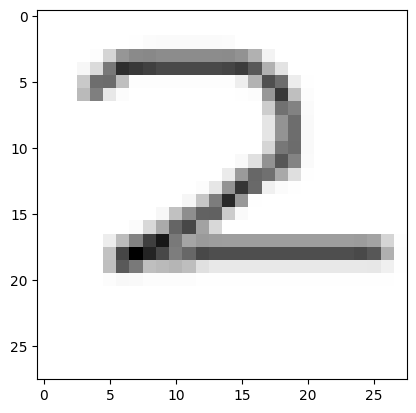

1/1 [==============================] - 0s 18ms/step
The number displayed probably is :3


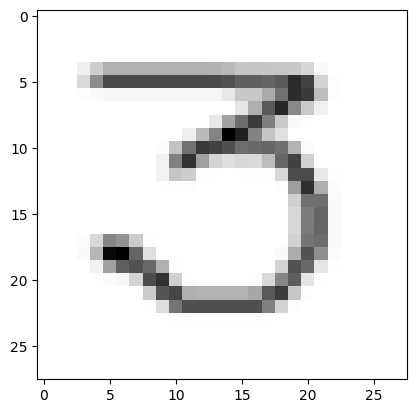

1/1 [==============================] - 0s 19ms/step
The number displayed probably is :3


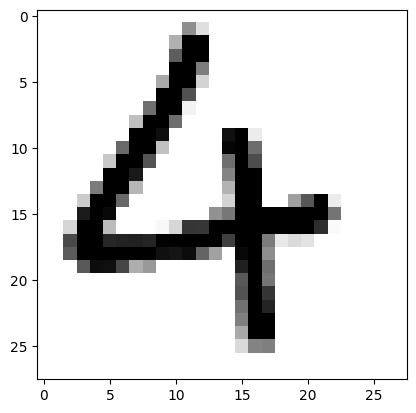

1/1 [==============================] - 0s 22ms/step
The number displayed probably is :5


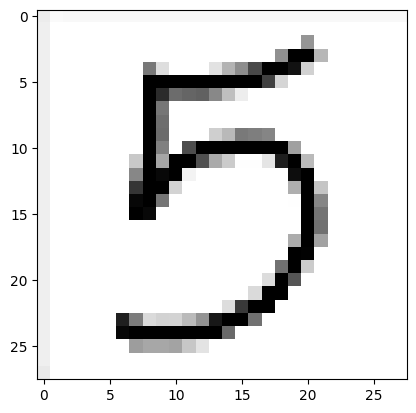

1/1 [==============================] - 0s 19ms/step
The number displayed probably is :6


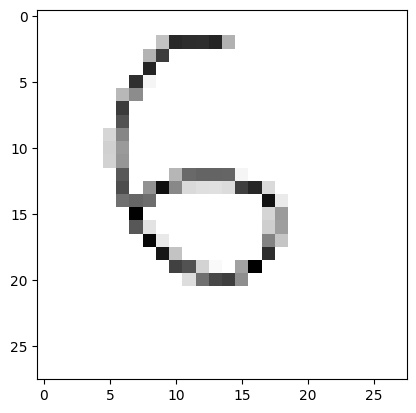

1/1 [==============================] - 0s 19ms/step
The number displayed probably is :7


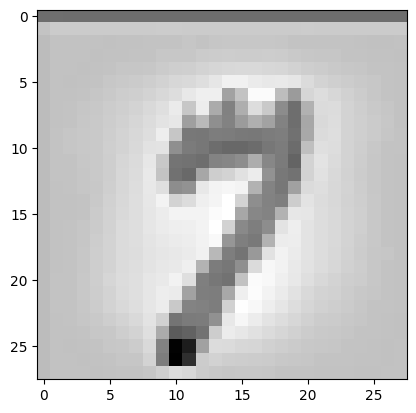

1/1 [==============================] - 0s 21ms/step
The number displayed probably is :8


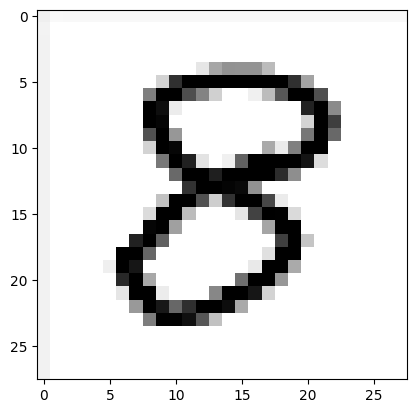

1/1 [==============================] - 0s 18ms/step
The number displayed probably is :9


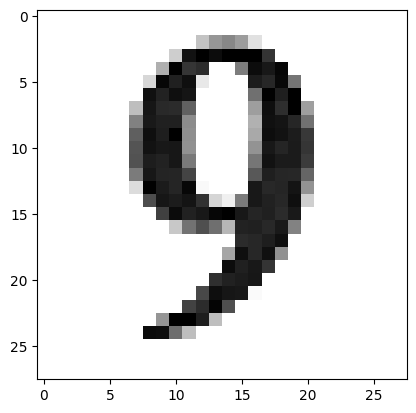

In [9]:
for i in range(0,10):
    img = cv.imread(f'{i}.png')[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f'The number displayed probably is :{np.argmax(prediction)}')
    plt.imshow(img[0],cmap=plt.cm.binary)
    plt.show()